In [1]:
import json
from skimage import io
import matplotlib.pyplot as plt
import os
import shutil

In [2]:
with open('data/graffiti-database.com/metadata.jsonl') as f:
    data = [json.loads(line) for line in f]

In [3]:
len(data)

44261

In [4]:
new_data = []
for item in data:
    name = item['artist']
    cap = item['caption']

    if name is None or name == 'None' or cap is None or cap == 'None':
        #print('skip')
        continue

    if ' ' not in name and 'Unknown' not in name and 'wall' in cap:
        new_data.append(item)

print(len(new_data))

12020


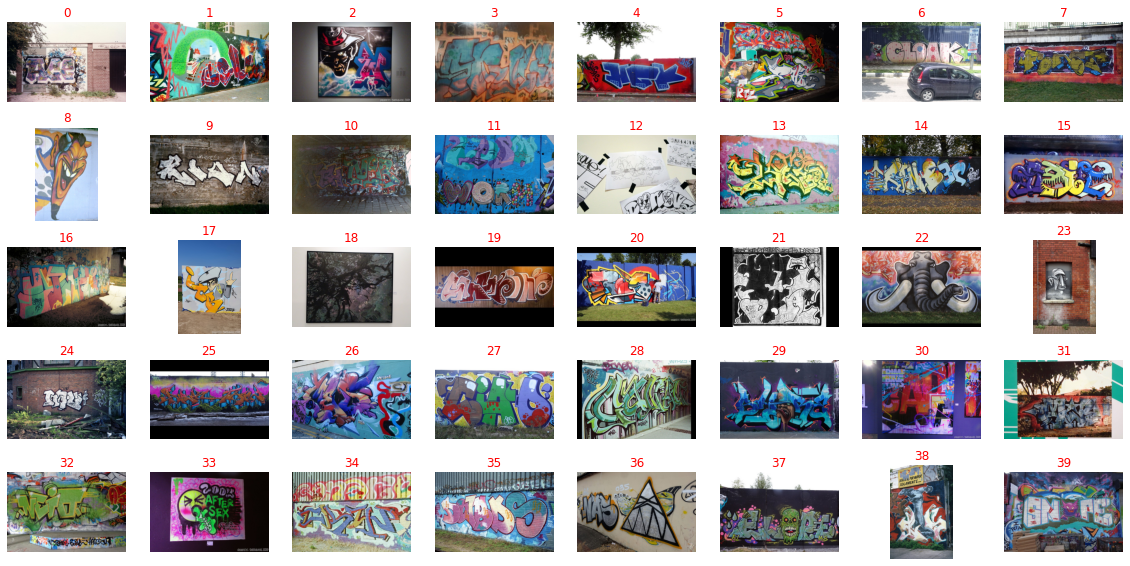

In [13]:
fig, axes = plt.subplots(5, 8, figsize=(20, 10))
axes = axes.flatten()
#27
i = 31 * 40
imgs = new_data[i:(i)+40]
for j, (img, ax) in enumerate(zip(imgs, axes)):
    img_path = 'data/graffiti-database.com/images/'+ img['file']
    img = io.imread(img_path)
    ax.imshow(img)  # Display the image in grayscale
    ax.axis('off')  # Turn off the axis labels
    ax.set_title(str(j), fontsize=12, color='red')  # Set the title as the index + 1
    plt.imshow(img)


In [14]:
selected = '24'.split(',')
for y in selected:
    
    img_path = 'data/graffiti-database.com/images/'+ imgs[int(y)]['file']
    shutil.copy2(img_path, '.')